<a href="https://colab.research.google.com/github/Aman-2311/pycharm-ml/blob/main/IRISH_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the data set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 # It ensures that matplotlib plots are displayed directly in the Jupyter/Colab output below the code cell.

In [ ]:
from sklearn.datasets import load_iris
data = load_iris() # Loading the Iris dataset into a 'Bunch' object named 'data'

x=data.data . x=features
y=data.target y =label

In [ ]:
# Create a pandas DataFrame from the Iris dataset features
df = pd.DataFrame(data.data , columns=data.feature_names)
# Add the target variable (species) as a new column to the DataFrame
df['species'] = data.target

Explore dataset

In [ ]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Generate descriptive statistics of the DataFrame, summarizing central tendency, dispersion, and shape of the distribution
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Calculate the sum of values for each column in the DataFrame
df.sum()

,0
sepal length (cm),876.5
sepal width (cm),458.6
petal length (cm),563.7
petal width (cm),179.9
species,150.0


Visualizing


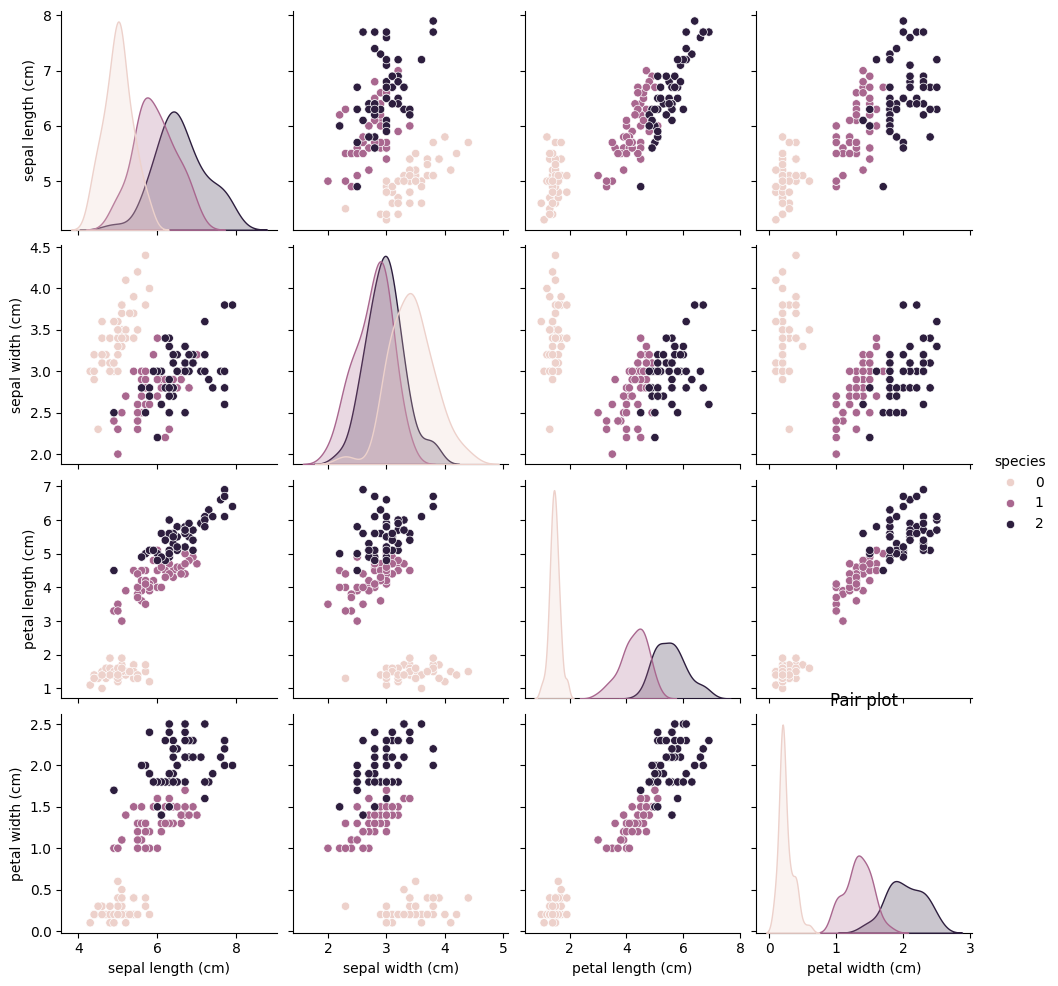

In [ ]:
sns.pairplot(data=df,hue='species')
plt.title('Pair plot')
plt.show()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

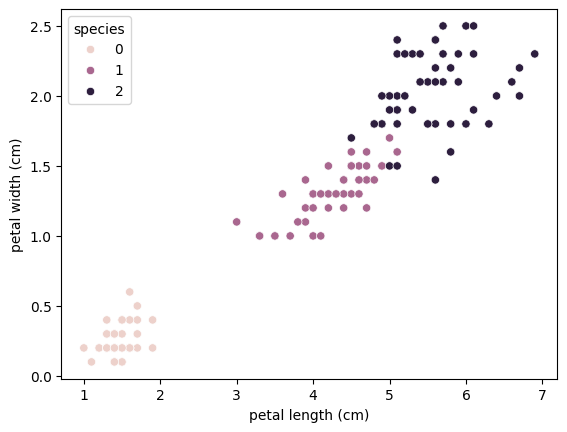

In [ ]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)', data=df,hue='species')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Train test split

In [ ]:
# Import train_test_split function for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Separate features (X) from the target variable (y)
X = df.drop('species',axis=1) # X contains all columns except 'species'
y = df['species']


# test_size=0.33: 33% of the data will be used for testing
# random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

LABEL ENCODER

convert string to integer value
like species name to 0 1 2 # already done automatically

In [ ]:
# The 'species' column already contains numerical values (0, 1, 2) from data.target,
# so LabelEncoder is technically redundant here, but it doesn't cause an error.
# from sklearn.preprocessing import LabelEncoder
# le= LabelEncoder()
# df['species']=le.fit_transform(df['species'])

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Train a classification model


In [ ]:
# Import the K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize the KNN classifier with 1 neighbor
knn =KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Train the KNN model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Make predictions on the test set
pred =knn.predict(X_test)

In [ ]:

pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [ ]:
# Import evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [ ]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=200) # Added max_iter to prevent potential convergence warning

In [ ]:
# Train the model
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Make predictions on the test set l
pred_logistic = model.predict(X_test)
print(classification_report(y_test, pred_logistic))
print('\n')
print(confusion_matrix(y_test, pred_logistic))
print('\n')
print("Accuracy:",model.score(X_test,y_test)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


Accuracy: 100.0


In [ ]:
# Import the Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize
dtree= DecisionTreeClassifier()

In [ ]:
# Train using the training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [229]:
# Make predictions on the test set using the trained Decision Tree model
pred_dtree = dtree.predict(X_test)
print('Decision Tree Classifier Report:')
print(classification_report(y_test, pred_dtree))
print('\n')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, pred_dtree))
print('\n')
print('Decision Tree Accuracy:',dtree.score(X_test,y_test)*100)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Decision Tree Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


Decision Tree Accuracy: 98.0


In [231]:
!git clone https://github.com/Aman-2311/pycharm-ml.git

fatal: destination path 'pycharm-ml' already exists and is not an empty directory.


In [238]:
!cp IRISH_DS.ipynb pycharm-ml/

cp: cannot stat 'IRISH_DS.ipynb': No such file or directory


In [237]:
import os

file_name = 'IRISH_DS.ipynb'

if os.path.exists(file_name):
    print(f"The file '{file_name}' exists in the current directory.")
else:
    print(f"The file '{file_name}' does NOT exist in the current directory.")

# You can also list files in the current directory to verify
print("\nFiles in current directory:")
!ls -F

The file 'IRISH_DS.ipynb' does NOT exist in the current directory.

Files in current directory:
pycharm-ml/  sample_data/
